In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


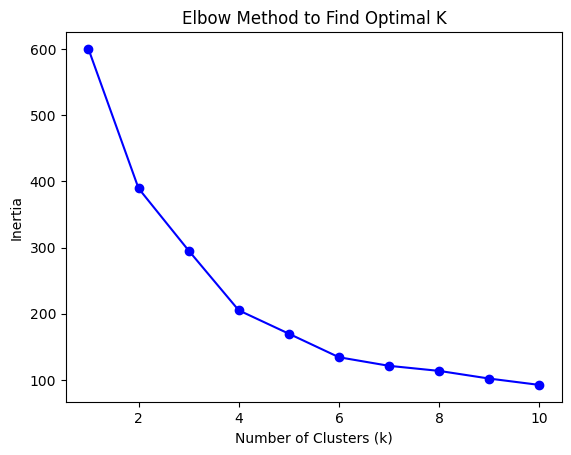

In [7]:
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Find Optimal K")
plt.show()


In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


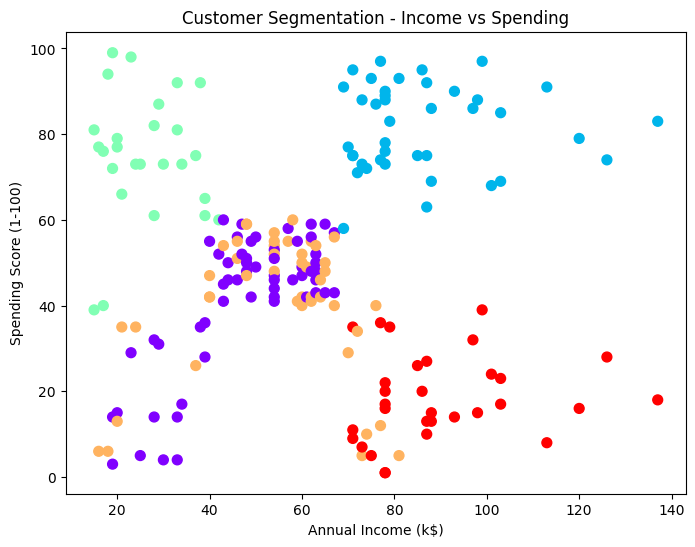

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], 
            c=df["Cluster"], cmap="rainbow", s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation - Income vs Spending")
plt.show()


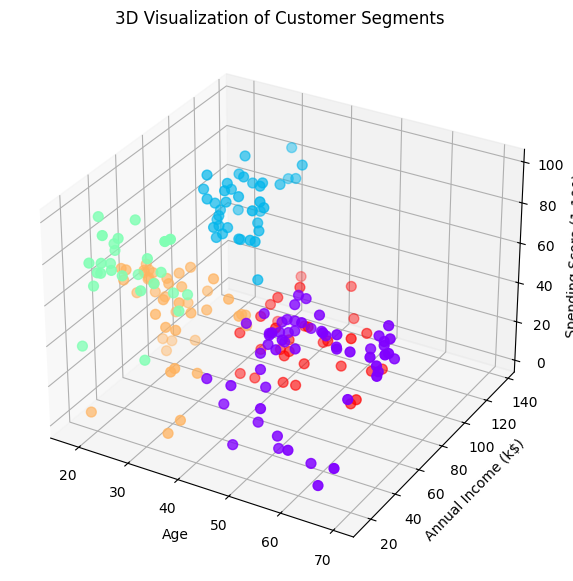

In [10]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], 
           c=df["Cluster"], cmap="rainbow", s=50)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("3D Visualization of Customer Segments")
plt.show()
